Question 2). Let’s say we want to build a model to predict booking prices on Airbnb. Between linear regression and random forest regression, which model would perform better and why?



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv("./datasets/housing.csv")

In [23]:
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [29]:
dataset.dropna(inplace=True)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [44]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['median_house_value'], axis=1)
y = dataset['median_house_value']

In [47]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [49]:
X_test, X_train, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
train_data = X_train.join(Y_train)

In [66]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16750,-122.46,37.71,44.0,364.0,102.0,339.0,98.0,2.4830,NEAR OCEAN,214300.0
18719,-122.38,40.61,14.0,4773.0,1133.0,2101.0,1072.0,1.7227,INLAND,NaN
14514,-117.15,32.90,12.0,1681.0,381.0,1050.0,362.0,4.2008,<1H OCEAN,176100.0
17003,-122.29,37.55,27.0,3789.0,874.0,2243.0,866.0,4.3900,NEAR OCEAN,270100.0
7483,-118.22,33.93,30.0,443.0,170.0,903.0,189.0,2.1964,<1H OCEAN,125000.0
...,...,...,...,...,...,...,...,...,...,...
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND,191700.0
15672,-122.44,37.80,52.0,3161.0,472.0,842.0,410.0,7.9761,NEAR BAY,NaN
13458,-117.38,34.11,32.0,3179.0,662.0,1878.0,661.0,3.1375,INLAND,101200.0
19086,-122.50,38.40,36.0,1860.0,364.0,777.0,339.0,4.1307,<1H OCEAN,NaN


In [60]:
train_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value    755
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

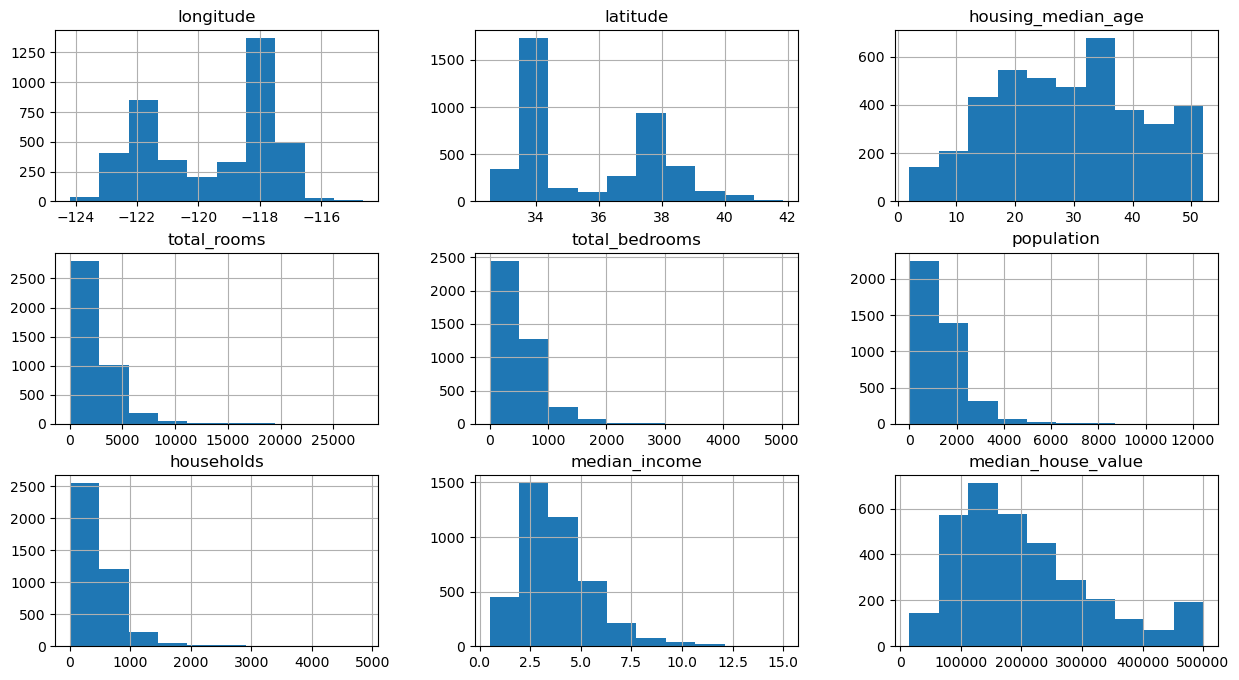

In [67]:
train_data.hist(figsize=(15,8))

Prepocessing 

In [68]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16750,-122.46,37.71,44.0,364.0,102.0,339.0,98.0,2.4830,NEAR OCEAN,214300.0
18719,-122.38,40.61,14.0,4773.0,1133.0,2101.0,1072.0,1.7227,INLAND,NaN
14514,-117.15,32.90,12.0,1681.0,381.0,1050.0,362.0,4.2008,<1H OCEAN,176100.0
17003,-122.29,37.55,27.0,3789.0,874.0,2243.0,866.0,4.3900,NEAR OCEAN,270100.0
7483,-118.22,33.93,30.0,443.0,170.0,903.0,189.0,2.1964,<1H OCEAN,125000.0
...,...,...,...,...,...,...,...,...,...,...
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND,191700.0
15672,-122.44,37.80,52.0,3161.0,472.0,842.0,410.0,7.9761,NEAR BAY,NaN
13458,-117.38,34.11,32.0,3179.0,662.0,1878.0,661.0,3.1375,INLAND,101200.0
19086,-122.50,38.40,36.0,1860.0,364.0,777.0,339.0,4.1307,<1H OCEAN,NaN


In [71]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

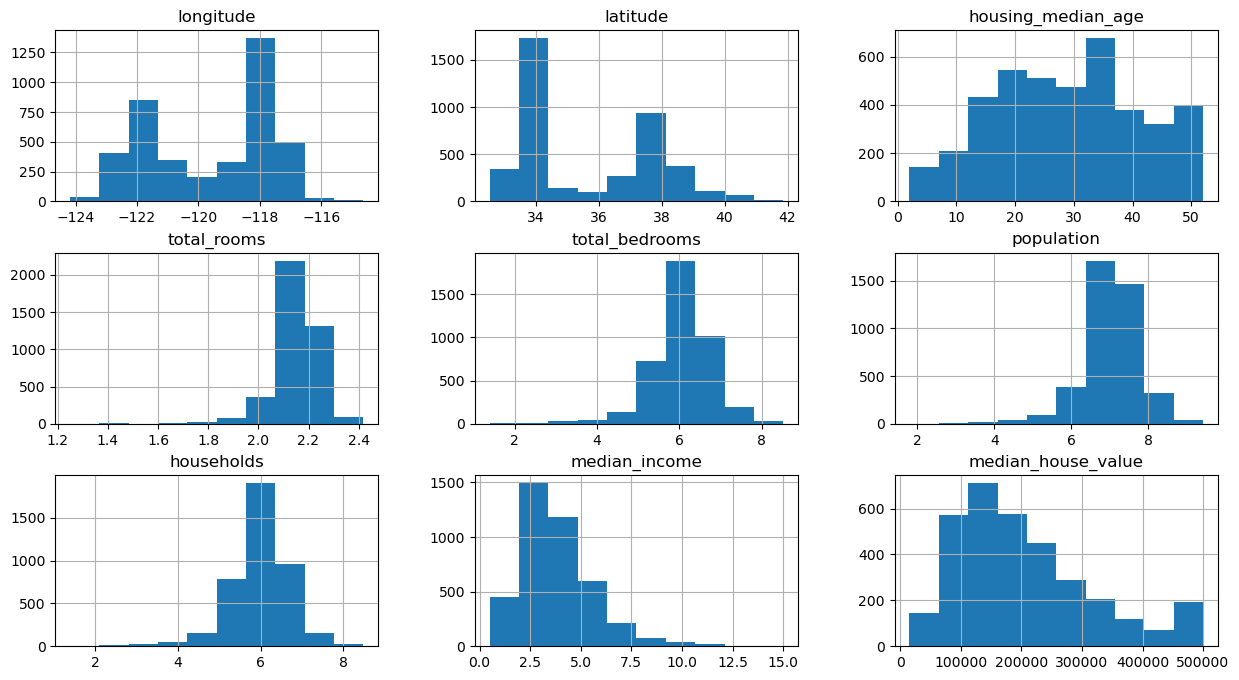

In [72]:
train_data.hist(figsize=(15,8))

Look at the ocean proximity since houses near the ocean are expensive therefore making it a relevant feature. Make it numerical binary to wrk with it

In [74]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     1772
INLAND        1302
NEAR OCEAN     558
NEAR BAY       455
Name: ocean_proximity, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))

In [80]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
16750,-122.46,37.71,44.0,1.931507,4.634729,5.828946,4.595120,2.4830,NEAR OCEAN,214300.0,0,0,0,1
18719,-122.38,40.61,14.0,2.248228,7.033506,7.650645,6.978214,1.7227,INLAND,NaN,0,1,0,0
14514,-117.15,32.90,12.0,2.131529,5.945421,6.957497,5.894403,4.2008,<1H OCEAN,176100.0,1,0,0,0
17003,-122.29,37.55,27.0,2.223555,6.774224,7.716015,6.765039,4.3900,NEAR OCEAN,270100.0,0,0,0,1
7483,-118.22,33.93,30.0,1.959507,5.141664,6.806829,5.247024,2.1964,<1H OCEAN,125000.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,-117.67,34.12,15.0,2.203789,6.206576,7.044033,6.161207,5.3525,INLAND,191700.0,0,1,0,0
15672,-122.44,37.80,52.0,2.203754,6.159095,6.736967,6.018593,7.9761,NEAR BAY,NaN,0,0,1,0
13458,-117.38,34.11,32.0,2.204381,6.496775,7.538495,6.495266,3.1375,INLAND,101200.0,0,1,0,0
19086,-122.50,38.40,36.0,2.143457,5.899897,6.656727,5.828946,4.1307,<1H OCEAN,NaN,1,0,0,0


In [81]:
train_data.drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
16750,-122.46,37.71,44.0,1.931507,4.634729,5.828946,4.595120,2.4830,214300.0,0,0,0,1
18719,-122.38,40.61,14.0,2.248228,7.033506,7.650645,6.978214,1.7227,NaN,0,1,0,0
14514,-117.15,32.90,12.0,2.131529,5.945421,6.957497,5.894403,4.2008,176100.0,1,0,0,0
17003,-122.29,37.55,27.0,2.223555,6.774224,7.716015,6.765039,4.3900,270100.0,0,0,0,1
7483,-118.22,33.93,30.0,1.959507,5.141664,6.806829,5.247024,2.1964,125000.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,-117.67,34.12,15.0,2.203789,6.206576,7.044033,6.161207,5.3525,191700.0,0,1,0,0
15672,-122.44,37.80,52.0,2.203754,6.159095,6.736967,6.018593,7.9761,NaN,0,0,1,0
13458,-117.38,34.11,32.0,2.204381,6.496775,7.538495,6.495266,3.1375,101200.0,0,1,0,0
19086,-122.50,38.40,36.0,2.143457,5.899897,6.656727,5.828946,4.1307,NaN,1,0,0,0


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

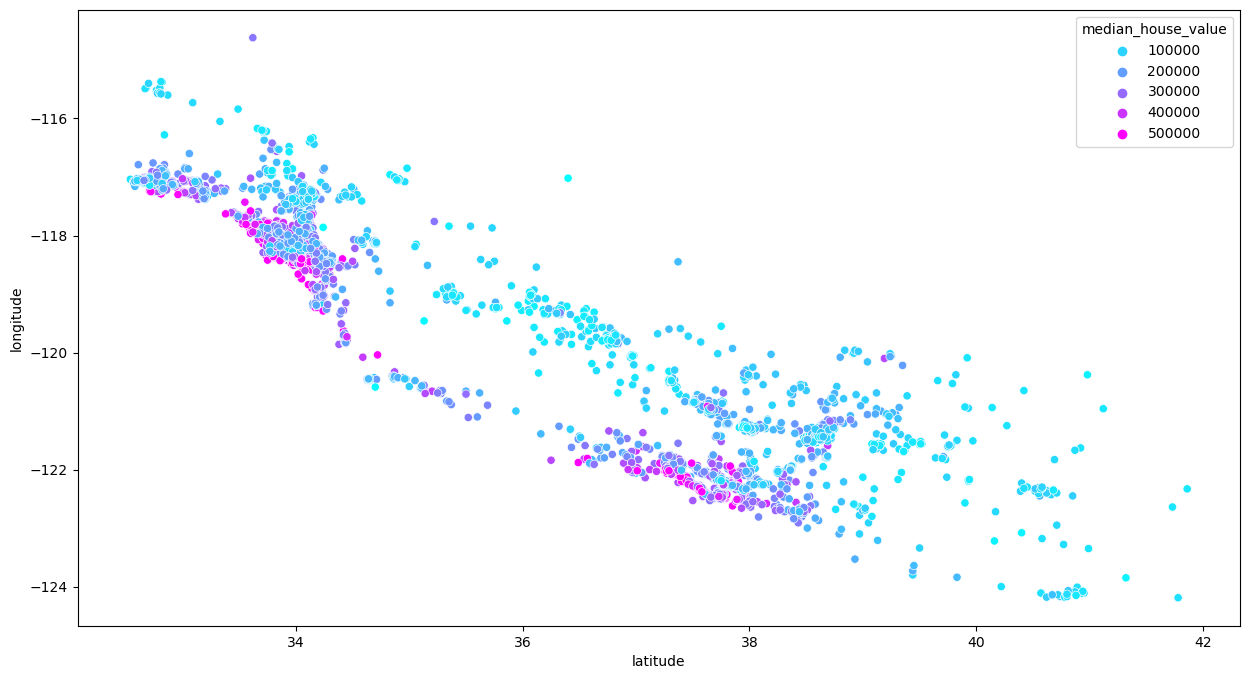

In [85]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="cool")

Feature engineering to combine features

In [86]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [87]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16750,-122.46,37.71,44.0,1.931507,4.634729,5.828946,4.595120,2.4830,NEAR OCEAN,214300.0,0,0,0,1,2.399541,0.420339
18719,-122.38,40.61,14.0,2.248228,7.033506,7.650645,6.978214,1.7227,INLAND,NaN,0,1,0,0,3.128467,0.322178
14514,-117.15,32.90,12.0,2.131529,5.945421,6.957497,5.894403,4.2008,<1H OCEAN,176100.0,1,0,0,0,2.789276,0.361619
17003,-122.29,37.55,27.0,2.223555,6.774224,7.716015,6.765039,4.3900,NEAR OCEAN,270100.0,0,0,0,1,3.046574,0.328683
7483,-118.22,33.93,30.0,1.959507,5.141664,6.806829,5.247024,2.1964,<1H OCEAN,125000.0,1,0,0,0,2.623958,0.373451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,-117.67,34.12,15.0,2.203789,6.206576,7.044033,6.161207,5.3525,INLAND,191700.0,0,1,0,0,2.816320,0.357688
15672,-122.44,37.80,52.0,2.203754,6.159095,6.736967,6.018593,7.9761,NEAR BAY,NaN,0,0,1,0,2.794819,0.366158
13458,-117.38,34.11,32.0,2.204381,6.496775,7.538495,6.495266,3.1375,INLAND,101200.0,0,1,0,0,2.947211,0.339383
19086,-122.50,38.40,36.0,2.143457,5.899897,6.656727,5.828946,4.1307,<1H OCEAN,NaN,1,0,0,0,2.752515,0.367726


<AxesSubplot:>

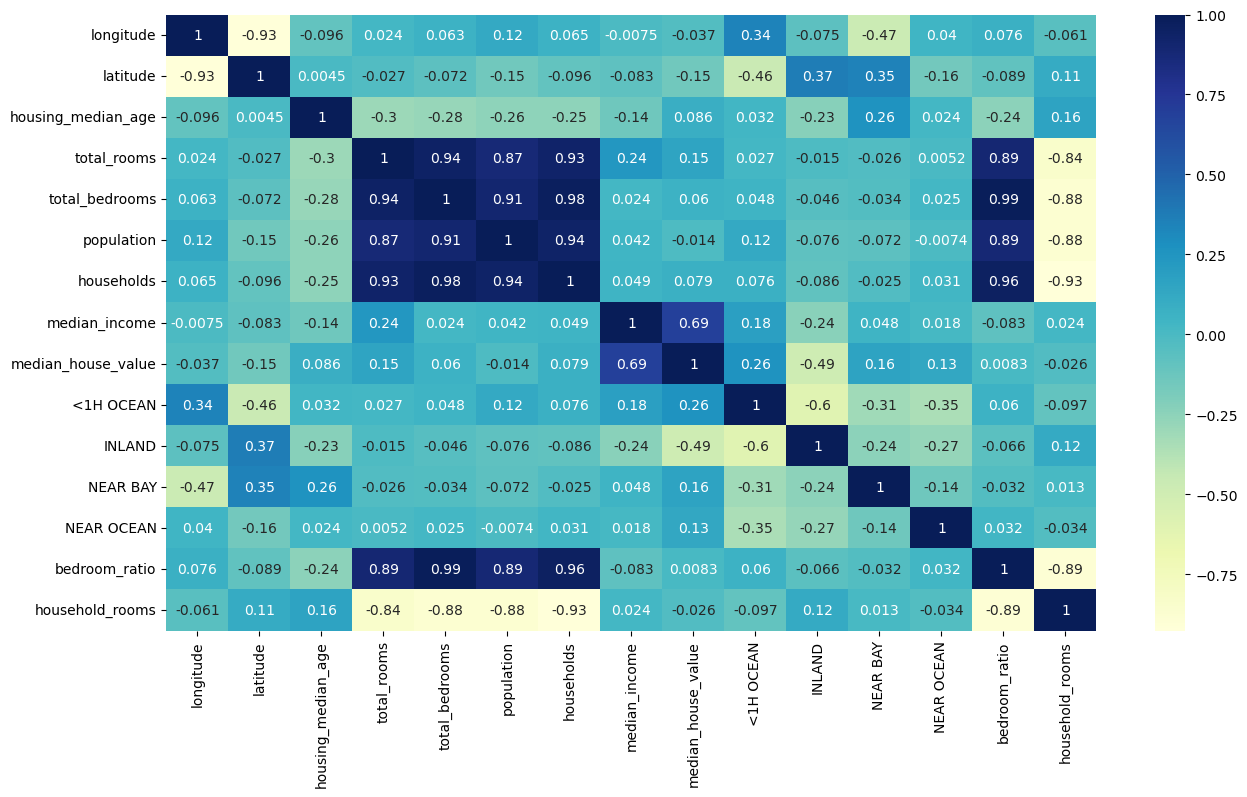

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap='YlGnBu')